In [1]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sc
import seaborn as sb
import pandas as pd
print (np.__version__)
print (sk.__version__)
#print (plt.__version__)
print (sc.__version__)
print (sb.__version__)
print (pd.__version__)

1.20.3
0.24.2
1.7.1
0.11.2
1.3.4


In [2]:
data1=pd.read_csv('train.csv')
data2=pd.read_csv('test.csv')
data1.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
data2.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
print(data1.shape)
print(data2.shape)
print(data1.info())
print(data2.info())
print(data1.describe())
print(data2.describe())

(891, 12)
(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null

0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

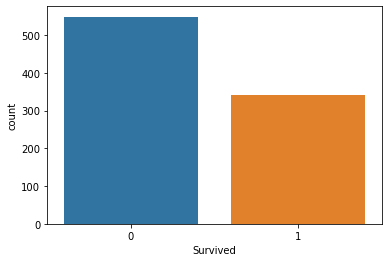

In [5]:
#No of people who didnt survived is far greater than the no of those who survived
print(data1.Survived.value_counts())
sb.countplot(x='Survived', data=data1)

male      577
female    314
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

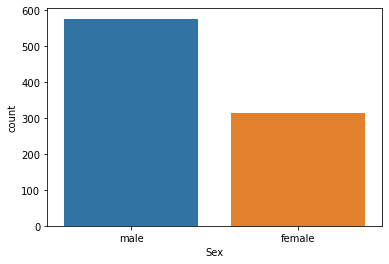

In [6]:
#Among the total no of passengers travelling is titanic, the no of males is greater than the no of females
print(data1.Sex.value_counts())
sb.countplot(x='Sex',data=data1)

0    549
1    342
Name: Survived, dtype: int64
male      577
female    314
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

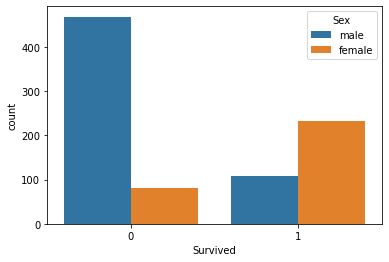

In [7]:
#Among the no of people woh didnt survived, the majority is male. Females survived more.
print(data1.Survived.value_counts())
print(data1.Sex.value_counts())
sb.countplot(x='Survived',hue='Sex',data=data1)

3    491
1    216
2    184
Name: Pclass, dtype: int64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

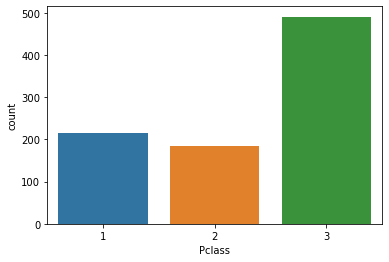

In [13]:
#There were more passengers travelling in 3rd class as compared to 1st and 2nd class
print(data1.Pclass.value_counts())
sb.countplot(x='Pclass',data=data1)

0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

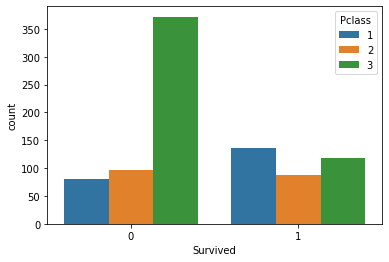

In [14]:
#The no of passengers aboard titanic who didnt survived, most of them belonged to 3rd Pclass. 1st and 2nd class passenger survived more
print(data1.Survived.value_counts())
print(data1.Pclass.value_counts())
sb.countplot(x='Survived',hue='Pclass',data=data1)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


<AxesSubplot:xlabel='SibSp', ylabel='count'>

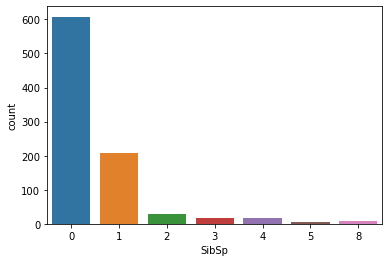

In [15]:
#There were more no of passengers aboard titanic who didnt have any sibling or spouse
print(data1.SibSp.value_counts())
sb.countplot(x='SibSp',data=data1)

0    549
1    342
Name: Survived, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


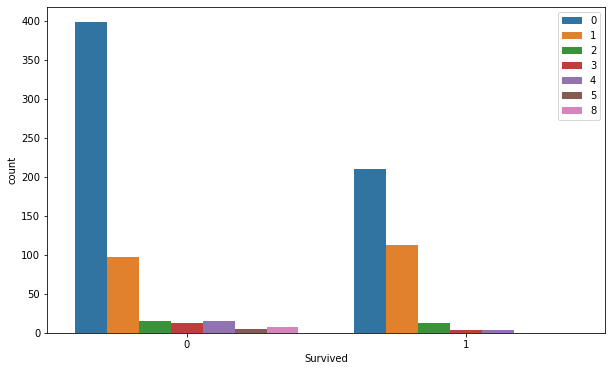

In [16]:
#Among the no of people who didnt survived, majority of them were travelling without sibling or spouse
fig=plt.figure(figsize=(10,6))
print(data1.Survived.value_counts())
print(data1.SibSp.value_counts())
sb.countplot(x='Survived',hue='SibSp',data=data1)
plt.legend(loc='upper right')

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


<AxesSubplot:xlabel='Parch', ylabel='count'>

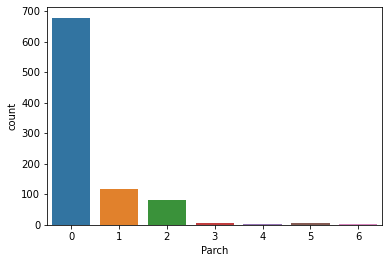

In [17]:
#There were more no of passengers aboard titanic who didnt have any parent or child
print(data1.Parch.value_counts())
sb.countplot(x='Parch',data=data1)

0    549
1    342
Name: Survived, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


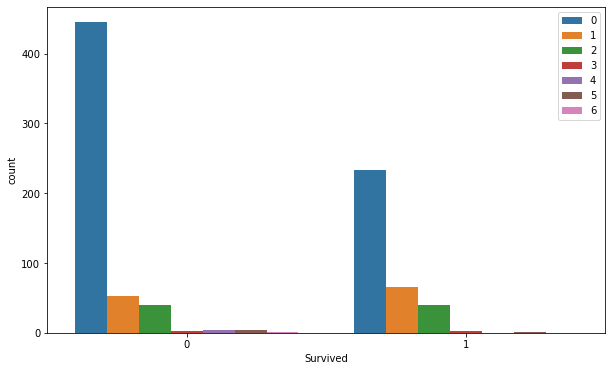

In [18]:
#Among the no of people who didnt survived, majority of them were travelling without parent or child
fig=plt.figure(figsize=(10,6))
print(data1.Survived.value_counts())
print(data1.Parch.value_counts())
sb.countplot(x='Survived',hue='Parch',data=data1)
plt.legend(loc='upper right')

S    644
C    168
Q     77
Name: Embarked, dtype: int64


<AxesSubplot:xlabel='Embarked', ylabel='count'>

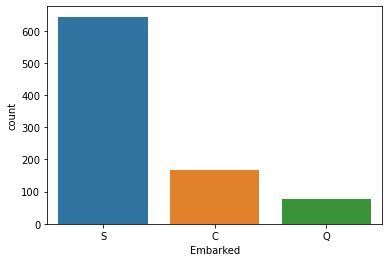

In [19]:
#There were more no of people travelling from southampton alone
print(data1.Embarked.value_counts())
sb.countplot(x='Embarked',data=data1)

0    549
1    342
Name: Survived, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


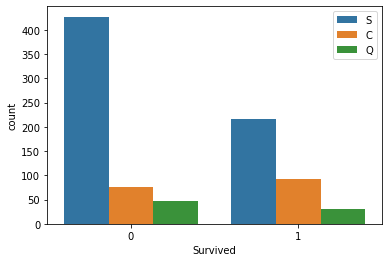

In [20]:
#Mostly the people who didnt survived were from southampton
print(data1.Survived.value_counts())
print(data1.Embarked.value_counts())
sb.countplot(x='Survived',hue='Embarked',data=data1)
plt.legend(loc='upper right')

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

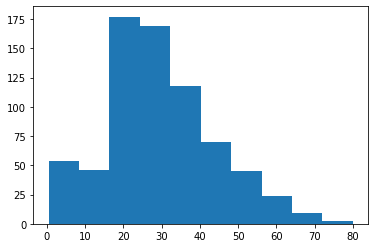

In [21]:
#Among the people aboard titanic,most of them were middle aged
plt.hist(data1.Age)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <BarContainer object of 20 artists>)

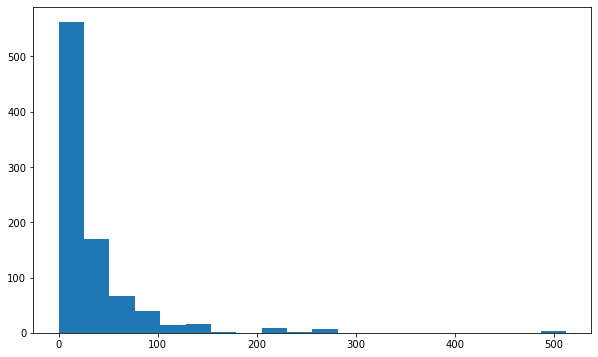

In [22]:
#Majority of the people were travelling in low fare ranges
fig=plt.figure(figsize=(10,6))
plt.hist(data1.Fare,bins=20)

In [23]:
#Data shows that we have 177 null values in age and 687 null values in cabin attribute
print(data1.isnull())
data1.isnull().sum()

     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

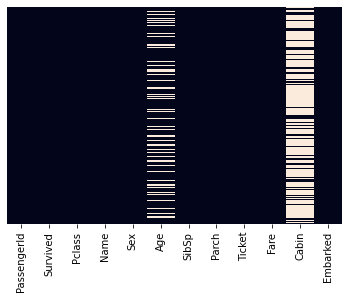

In [24]:
sb.heatmap(data1.isnull(),yticklabels=False,cbar=False)

C:\Users\Shalini-Anubhav\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

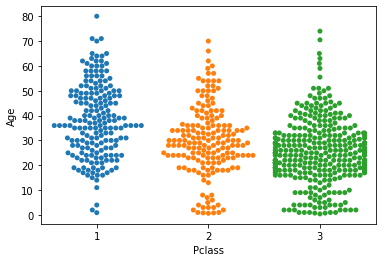

In [25]:
#Distribution of passenger travel class vs age i.e majority of middle aged people were travelling in 3rd class 
sb.swarmplot(x='Pclass',y='Age',data=data1)

<AxesSubplot:>

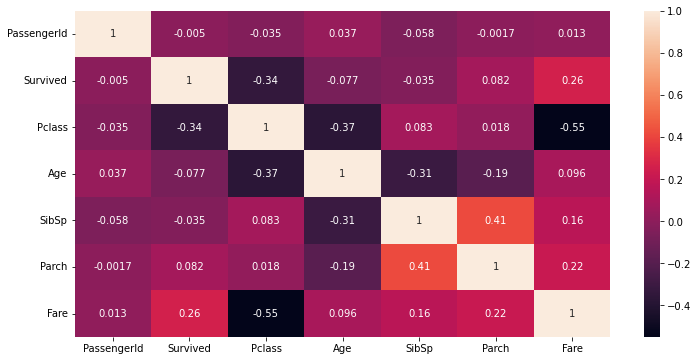

In [26]:
fig=plt.figure(figsize=(12,6))
sb.heatmap(data1.corr(method='pearson'),annot=True)

In [27]:
data1['Age'].isnull().sum()

177

In [28]:
data1.drop('Cabin',axis=1,inplace=True)

In [29]:
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [30]:
import math
data1['Embarked'] = data1['Embarked'].fillna(data1['Embarked'].mode()[0])

In [31]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [32]:
data1.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [33]:
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [38]:
data2.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [39]:
data2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [34]:
sex1=pd.get_dummies(data1['Sex'],drop_first=True)
print(sex1)
where=pd.get_dummies(data1['Embarked'],drop_first=True)
print(where)
class1=pd.get_dummies(data1['Pclass'],drop_first=True)
print(class1)

     male
0       1
1       0
2       0
3       0
4       1
..    ...
886     1
887     0
888     0
889     1
890     1

[891 rows x 1 columns]
     Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
..  .. ..
886  0  1
887  0  1
888  0  1
889  0  0
890  1  0

[891 rows x 2 columns]
     2  3
0    0  1
1    0  0
2    0  1
3    0  0
4    0  1
..  .. ..
886  1  0
887  0  0
888  0  1
889  0  0
890  0  1

[891 rows x 2 columns]


In [40]:
sex1=pd.get_dummies(data2['Sex'],drop_first=True)
print(sex1)
where=pd.get_dummies(data2['Embarked'],drop_first=True)
print(where)
class1=pd.get_dummies(data2['Pclass'],drop_first=True)
print(class1)

     male
0       1
1       0
2       1
3       1
4       0
..    ...
413     1
414     0
415     1
416     1
417     1

[418 rows x 1 columns]
     Q  S
0    1  0
1    0  1
2    1  0
3    0  1
4    0  1
..  .. ..
413  0  1
414  0  0
415  0  1
416  0  1
417  0  0

[418 rows x 2 columns]
     2  3
0    0  1
1    0  1
2    1  0
3    0  1
4    0  1
..  .. ..
413  0  1
414  0  0
415  0  1
416  0  1
417  0  1

[418 rows x 2 columns]


In [35]:
data1=pd.concat([data1,sex1,where,class1],axis=1)
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S,2,3
0,0,3,male,22.0,1,0,7.2500,S,1,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1,0,0
4,0,3,male,35.0,0,0,8.0500,S,1,0,1,0,1


In [41]:
data2=pd.concat([data2,sex1,where,class1],axis=1)
data2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S,2,3
0,3,male,34.5,0,0,7.8292,Q,1,1,0,0,1
1,3,female,47.0,1,0,7.0000,S,0,0,1,0,1
2,2,male,62.0,0,0,9.6875,Q,1,1,0,1,0
3,3,male,27.0,0,0,8.6625,S,1,0,1,0,1
4,3,female,22.0,1,1,12.2875,S,0,0,1,0,1


In [42]:
#data1.drop(['Pclass','Sex','Embarked'],axis=1,inplace=True)
data2.drop(['Pclass','Sex','Embarked'],axis=1,inplace=True)

In [43]:
#data1.head()
data2.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1


In [44]:
data2.isnull().sum()

Age      86
SibSp     0
Parch     0
Fare      1
male      0
Q         0
S         0
2         0
3         0
dtype: int64

In [45]:
data1['Family'] = data1['SibSp'] + data1['Parch']
data2['Family'] = data2['SibSp'] + data2['Parch']

In [46]:
pd.crosstab(data1['Family'], data1['Survived'])

Survived,0,1
Family,,
0,374,163
1,72,89
2,43,59
3,8,21
4,12,3
5,19,3
6,8,4
7,6,0
10,7,0


In [47]:
data1['Age'] = data1['Age'].fillna(data1['Age'].mode()[0])

In [208]:
data2['Age'] = data2['Age'].fillna(data2['Age'].mode()[0])

In [209]:
print(data1.info())
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   male      891 non-null    uint8  
 6   Q         891 non-null    uint8  
 7   S         891 non-null    uint8  
 8   2         891 non-null    uint8  
 9   3         891 non-null    uint8  
 10  Family    891 non-null    int64  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     418 non-null    float64
 1   SibSp   418 non-null    int64  
 2   Parch   418 non-null    int64  
 3   Fare    417 non-null    flo

In [211]:
data2['Fare'] = data2['Fare'].fillna(data2['Fare'].mean())

In [212]:
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     418 non-null    float64
 1   SibSp   418 non-null    int64  
 2   Parch   418 non-null    int64  
 3   Fare    418 non-null    float64
 4   male    418 non-null    uint8  
 5   Q       418 non-null    uint8  
 6   S       418 non-null    uint8  
 7   2       418 non-null    uint8  
 8   3       418 non-null    uint8  
 9   Family  418 non-null    int64  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 18.5 KB
None


In [214]:
data1.drop(['SibSp','Parch'],axis=1,inplace=True)
data2.drop(['SibSp','Parch'],axis=1,inplace=True)

In [223]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       891 non-null    float64
 2   Fare      891 non-null    float64
 3   male      891 non-null    uint8  
 4   Q         891 non-null    uint8  
 5   S         891 non-null    uint8  
 6   2         891 non-null    uint8  
 7   3         891 non-null    uint8  
 8   Family    891 non-null    int64  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 32.3 KB


In [224]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     418 non-null    float64
 1   Fare    418 non-null    float64
 2   male    418 non-null    uint8  
 3   Q       418 non-null    uint8  
 4   S       418 non-null    uint8  
 5   2       418 non-null    uint8  
 6   3       418 non-null    uint8  
 7   Family  418 non-null    int64  
dtypes: float64(2), int64(1), uint8(5)
memory usage: 12.0 KB


<AxesSubplot:>

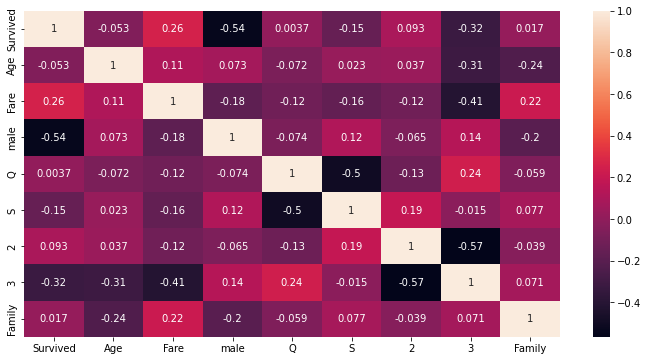

In [225]:
fig=plt.figure(figsize=(12,6))
sb.heatmap(data1.corr(method='pearson'),annot=True)

In [251]:
x=data1.drop(['Survived'],axis=1)
y=data1['Survived']
X_test=data2

In [258]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.size)
print(x_train.shape)
print(x_test.size)
print(x_test.shape)
print(y_train.size)
print(y_train.shape)
print(y_test.size)
print(y_test.shape)

5344
(668, 8)
1784
(223, 8)
668
(668,)
223
(223,)


In [259]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(max_iter=200)
logreg.fit(x_train, y_train)
y_pred=logreg.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       128
           1       0.80      0.69      0.74        95

    accuracy                           0.79       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223

[[111  17]
 [ 29  66]]
79.37219730941703


In [261]:
y_pred1=logreg.predict(X_test)
y_pred1

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [257]:
submission = pd.read_csv('gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [264]:
output=pd.DataFrame({'PassengerId':submission.PassengerId,'Survived':y_pred1})

In [267]:
output.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [268]:
output.to_csv('submission1.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
